# Mixed media model

In [16]:
import numpy
import pandas
import plotly.express
import plotly.graph_objects
import plotly.subplots

## Load data

In [17]:
dataset_dataframe = pandas.read_csv(filepath_or_buffer="../data/data.csv",
                                        sep=',', delimiter=None,
                                        header='infer')
dataset_dataframe.head()

,wk_strt_dt,yr_nbr,qtr_nbr,prd,wk_nbr,wk_in_yr_nbr,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,...,seas_prd_12,seas_week_40,seas_week_41,seas_week_42,seas_week_43,seas_week_44,seas_week_45,seas_week_46,seas_week_47,seas_week_48
0,2014-08-03,2014,3,7,1,27,4863885,29087520,2421933,692315,...,0,0,0,0,0,0,0,0,0,0
1,2014-08-10,2014,3,7,2,28,20887502,8345120,3984494,475810,...,0,0,0,0,0,0,0,0,0,0
2,2014-08-17,2014,3,7,3,29,11097724,17276800,1846832,784732,...,0,0,0,0,0,0,0,0,0,0
3,2014-08-24,2014,3,7,4,30,1023446,18468480,2394834,1032301,...,0,0,0,0,0,0,0,0,0,0
4,2014-08-31,2014,3,8,1,31,21109811,26659920,3312008,400456,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dataset_dataframe["wk_strt_dt"] = pandas.to_datetime(dataset_dataframe["wk_strt_dt"])
dataset_dataframe.dtypes

## EDA

In [20]:
def ExploratoryDataAnalysis(dataframe_to_analyse: pandas.DataFrame) -> None:
    """Perform exploratory data analysis on the provided dataset

    :param dataframe_to_analyse: dataframe to analyse
    :type dataframe_to_analyse: pandas.Dataframe
    :returns: None
    """
    # Nulls heatmap plot
    nulls_heatmap_figure = plotly.express.imshow(
        img=dataframe_to_analyse.isna().astype(numpy.int8),
        color_continuous_scale=['#304fa7', '#8bb7cf'],
        title='Null values heatmap', height=400)
    # Nulls heatmap figure show
    nulls_heatmap_figure.show()

    # Nulls ratio plot
    nulls_ratio_figure = plotly.express.bar(
        x=dataframe_to_analyse.isna().mean().sort_values().index,
        y=dataframe_to_analyse.isna().mean().sort_values().values,
        color_discrete_sequence=['#304fa7'],
        title='Null values ratio feature wise',
        labels={'x': 'Feature', 'y': 'Ratio'}, height=400)
    # Nulls ratio figure show
    nulls_ratio_figure.show()

    # Feature split in numerical and non numerical
    numeric_features_dataframe = dataframe_to_analyse.select_dtypes(
        include='number')
    non_numeric_features_dataframe = dataframe_to_analyse.select_dtypes(
        exclude='number')

    # Subplot creation for unique values count
    unique_values_figure = plotly.subplots.make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            "Unique values per Numerical feature",
            "Unique values per Non Numerical feature"))
    # Add traces for numeric and non numeric unique values count
    unique_values_figure.add_trace(plotly.graph_objects.Bar(
        x=numeric_features_dataframe.nunique(axis=0, dropna=True).index,
        y=numeric_features_dataframe.nunique(axis=0, dropna=True).values,
        marker={"color": '#304fa7'}),
        row=1, col=1)
    unique_values_figure.add_trace(plotly.graph_objects.Bar(
        x=non_numeric_features_dataframe.nunique(axis=0, dropna=True).index,
        y=non_numeric_features_dataframe.nunique(axis=0, dropna=True).values,
        marker={"color": '#8bb7cf'}),
        row=1, col=2)
    # Unique values figure show
    unique_values_figure.show()

    # Get upper and lower threshold for outliers
    upper_outlier_threshold = numeric_features_dataframe.quantile(
        0.75) + 1.5 * (numeric_features_dataframe.quantile(
        0.75) - numeric_features_dataframe.quantile(0.25))
    lower_outlier_threshold = numeric_features_dataframe.quantile(
        0.25) - 1.5 * (numeric_features_dataframe.quantile(
        0.75) - numeric_features_dataframe.quantile(0.25))
    # Creation of a dict that will store feature:outliers values
    outliers_in_features_dict = {}
    for feature in numeric_features_dataframe:
        outliers_in_features_dict[feature] = len(
            numeric_features_dataframe[
                numeric_features_dataframe[feature] >
                upper_outlier_threshold[feature]]) + len(
            numeric_features_dataframe[
                numeric_features_dataframe[feature] <
                lower_outlier_threshold[feature]])

    # Outliers number plot
    outliers_number_figure = plotly.express.bar(
        x=outliers_in_features_dict.keys(),
        y=outliers_in_features_dict.values(),
        color_discrete_sequence=['#304fa7'],
        title='Outliers number feature wise',
        labels={'x': 'Feature', 'y': 'Ratio'}, height=400)
    # Outliers number figure show
    outliers_number_figure.show()

In [21]:
ExploratoryDataAnalysis(dataset_dataframe)

In [28]:
#dataset_dataframe.columns

In [23]:
media_features = ['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
       'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
       'mdip_sms', 'mdip_aff', 'mdip_sem', 'mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
       'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
       'mdsp_on', 'mdsp_sem', 'sales']
season_features = ['seas_prd_1', 'seas_prd_2', 'seas_prd_3',
       'seas_prd_4', 'seas_prd_5', 'seas_prd_6', 'seas_prd_7', 'seas_prd_8',
       'seas_prd_9', 'seas_prd_12', 'seas_week_40', 'seas_week_41',
       'seas_week_42', 'seas_week_43', 'seas_week_44', 'seas_week_45',
       'seas_week_46', 'seas_week_47', 'seas_week_48', 'sales']
holiday_features = ["hldy_Black Friday", "hldy_Christmas Day",
       "hldy_Christmas Eve", "hldy_Columbus Day", "hldy_Cyber Monday",
       "hldy_Day after Christmas", "hldy_Easter", "hldy_Father's Day",
       "hldy_Green Monday", "hldy_July 4th", "hldy_Labor Day", "hldy_MLK",
       "hldy_Memorial Day", "hldy_Mother's Day", "hldy_NYE",
       "hldy_New Year's Day", "hldy_Pre Thanksgiving", "hldy_Presidents Day",
       "hldy_Prime Day", "hldy_Thanksgiving", "hldy_Valentine's Day",
       "hldy_Veterans Day", "sales"]
dates_features = ['wk_strt_dt', 'yr_nbr', 'qtr_nbr', 'prd', 'wk_nbr', 'wk_in_yr_nbr', 'sales']

In [24]:
feature_correlation_figure = plotly.express.imshow(dataset_dataframe[media_features].corr().round(2), zmin =- 1, zmax = 1,
                text_auto = True, width = 800, height = 700, 
                aspect = None, color_continuous_scale = 'rdbu')
feature_correlation_figure.show()

In [25]:
feature_correlation_figure = plotly.express.imshow(dataset_dataframe[season_features].corr().round(2), zmin =- 1, zmax = 1,
                text_auto = True, width = 800, height = 700, 
                aspect = None, color_continuous_scale = 'rdbu')
feature_correlation_figure.show()

In [26]:
feature_correlation_figure = plotly.express.imshow(dataset_dataframe[holiday_features].corr().round(2), zmin =- 1, zmax = 1,
                text_auto = True, width = 800, height = 700, 
                aspect = None, color_continuous_scale = 'rdbu')
feature_correlation_figure.show()

In [27]:
feature_correlation_figure = plotly.express.imshow(dataset_dataframe[dates_features].corr().round(2), zmin =- 1, zmax = 1,
                text_auto = True, width = 800, height = 700, 
                aspect = None, color_continuous_scale = 'rdbu')
feature_correlation_figure.show()

In [29]:
fig = plotly.express.histogram(x=dataset_dataframe['sales'],
                 barmode='group',
                 color_discrete_sequence=['#304fa7', '#8bb7cf'], height=300)
fig.show()

In [32]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y="sales")
fig.show()

In [35]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=media_features)
fig.show()

In [77]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=holiday_features)
fig.show()

## pymc-marketing 0.1.0


In [80]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Normalize media

In [69]:
dataset_dataframe["mdip_dm_normalized"] = dataset_dataframe["mdip_dm"] / dataset_dataframe["mdip_dm"].max()
dataset_dataframe["mdip_inst_normalized"] = dataset_dataframe["mdip_inst"] / dataset_dataframe["mdip_inst"].max()

### Geometric adstock transformation

In [70]:
# apply geometric adstock transformation
alpha1: float = 0.4
alpha2: float = 0.2

dataset_dataframe["mdip_dm_adstock"] = (
    geometric_adstock(x=dataset_dataframe["mdip_dm_normalized"].to_numpy(), alpha=alpha1, l_max=8, normalize=True)
    .eval()
    .flatten()
)

dataset_dataframe["mdip_inst_adstock"] = (
    geometric_adstock(x=dataset_dataframe["mdip_inst_normalized"].to_numpy(), alpha=alpha2, l_max=8, normalize=True)
    .eval()
    .flatten()
)

In [71]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=["mdip_dm_normalized", "mdip_dm_adstock"])
fig.show()

In [72]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=["mdip_inst_normalized", "mdip_inst_adstock"])
fig.show()

### Saturation transformation

In [73]:
# apply saturation transformation
lam1: float = 4.0
lam2: float = 3.0

dataset_dataframe["mdip_dm_adstock_saturated"] = logistic_saturation(
    x=dataset_dataframe["mdip_dm_adstock"].to_numpy(), lam=lam1
).eval()

dataset_dataframe["mdip_inst_adstock_saturated"] = logistic_saturation(
    x=dataset_dataframe["mdip_inst_adstock"].to_numpy(), lam=lam2
).eval()

In [74]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=["mdip_dm_normalized", "mdip_dm_adstock", "mdip_dm_adstock_saturated"])
fig.show()

In [75]:
fig = plotly.express.line(dataset_dataframe, x="wk_strt_dt", y=["mdip_inst_normalized", "mdip_inst_adstock", "mdip_inst_adstock_saturated"])
fig.show()

### Media contribution

In [79]:
amplitude = 1
beta_1 = 3.0
beta_2 = 2.0
betas = [beta_1, beta_2]

contribution_share_x1: float = (beta_1 * dataset_dataframe["mdip_dm_adstock_saturated"]).sum() / (
    beta_1 * dataset_dataframe["mdip_dm_adstock_saturated"] + beta_2 * dataset_dataframe["mdip_inst_adstock_saturated"]
).sum()

contribution_share_x2: float = (beta_2 * dataset_dataframe["mdip_inst_adstock_saturated"]).sum() / (
    beta_1 * dataset_dataframe["mdip_dm_adstock_saturated"] + beta_2 * dataset_dataframe["mdip_inst_adstock_saturated"]
).sum()

print(f"Contribution Share of mdip_dm: {contribution_share_x1:.2f}")
print(f"Contribution Share of mdip_inst: {contribution_share_x2:.2f}")

Contribution Share of mdip_dm: 0.70
Contribution Share of mdip_inst: 0.30


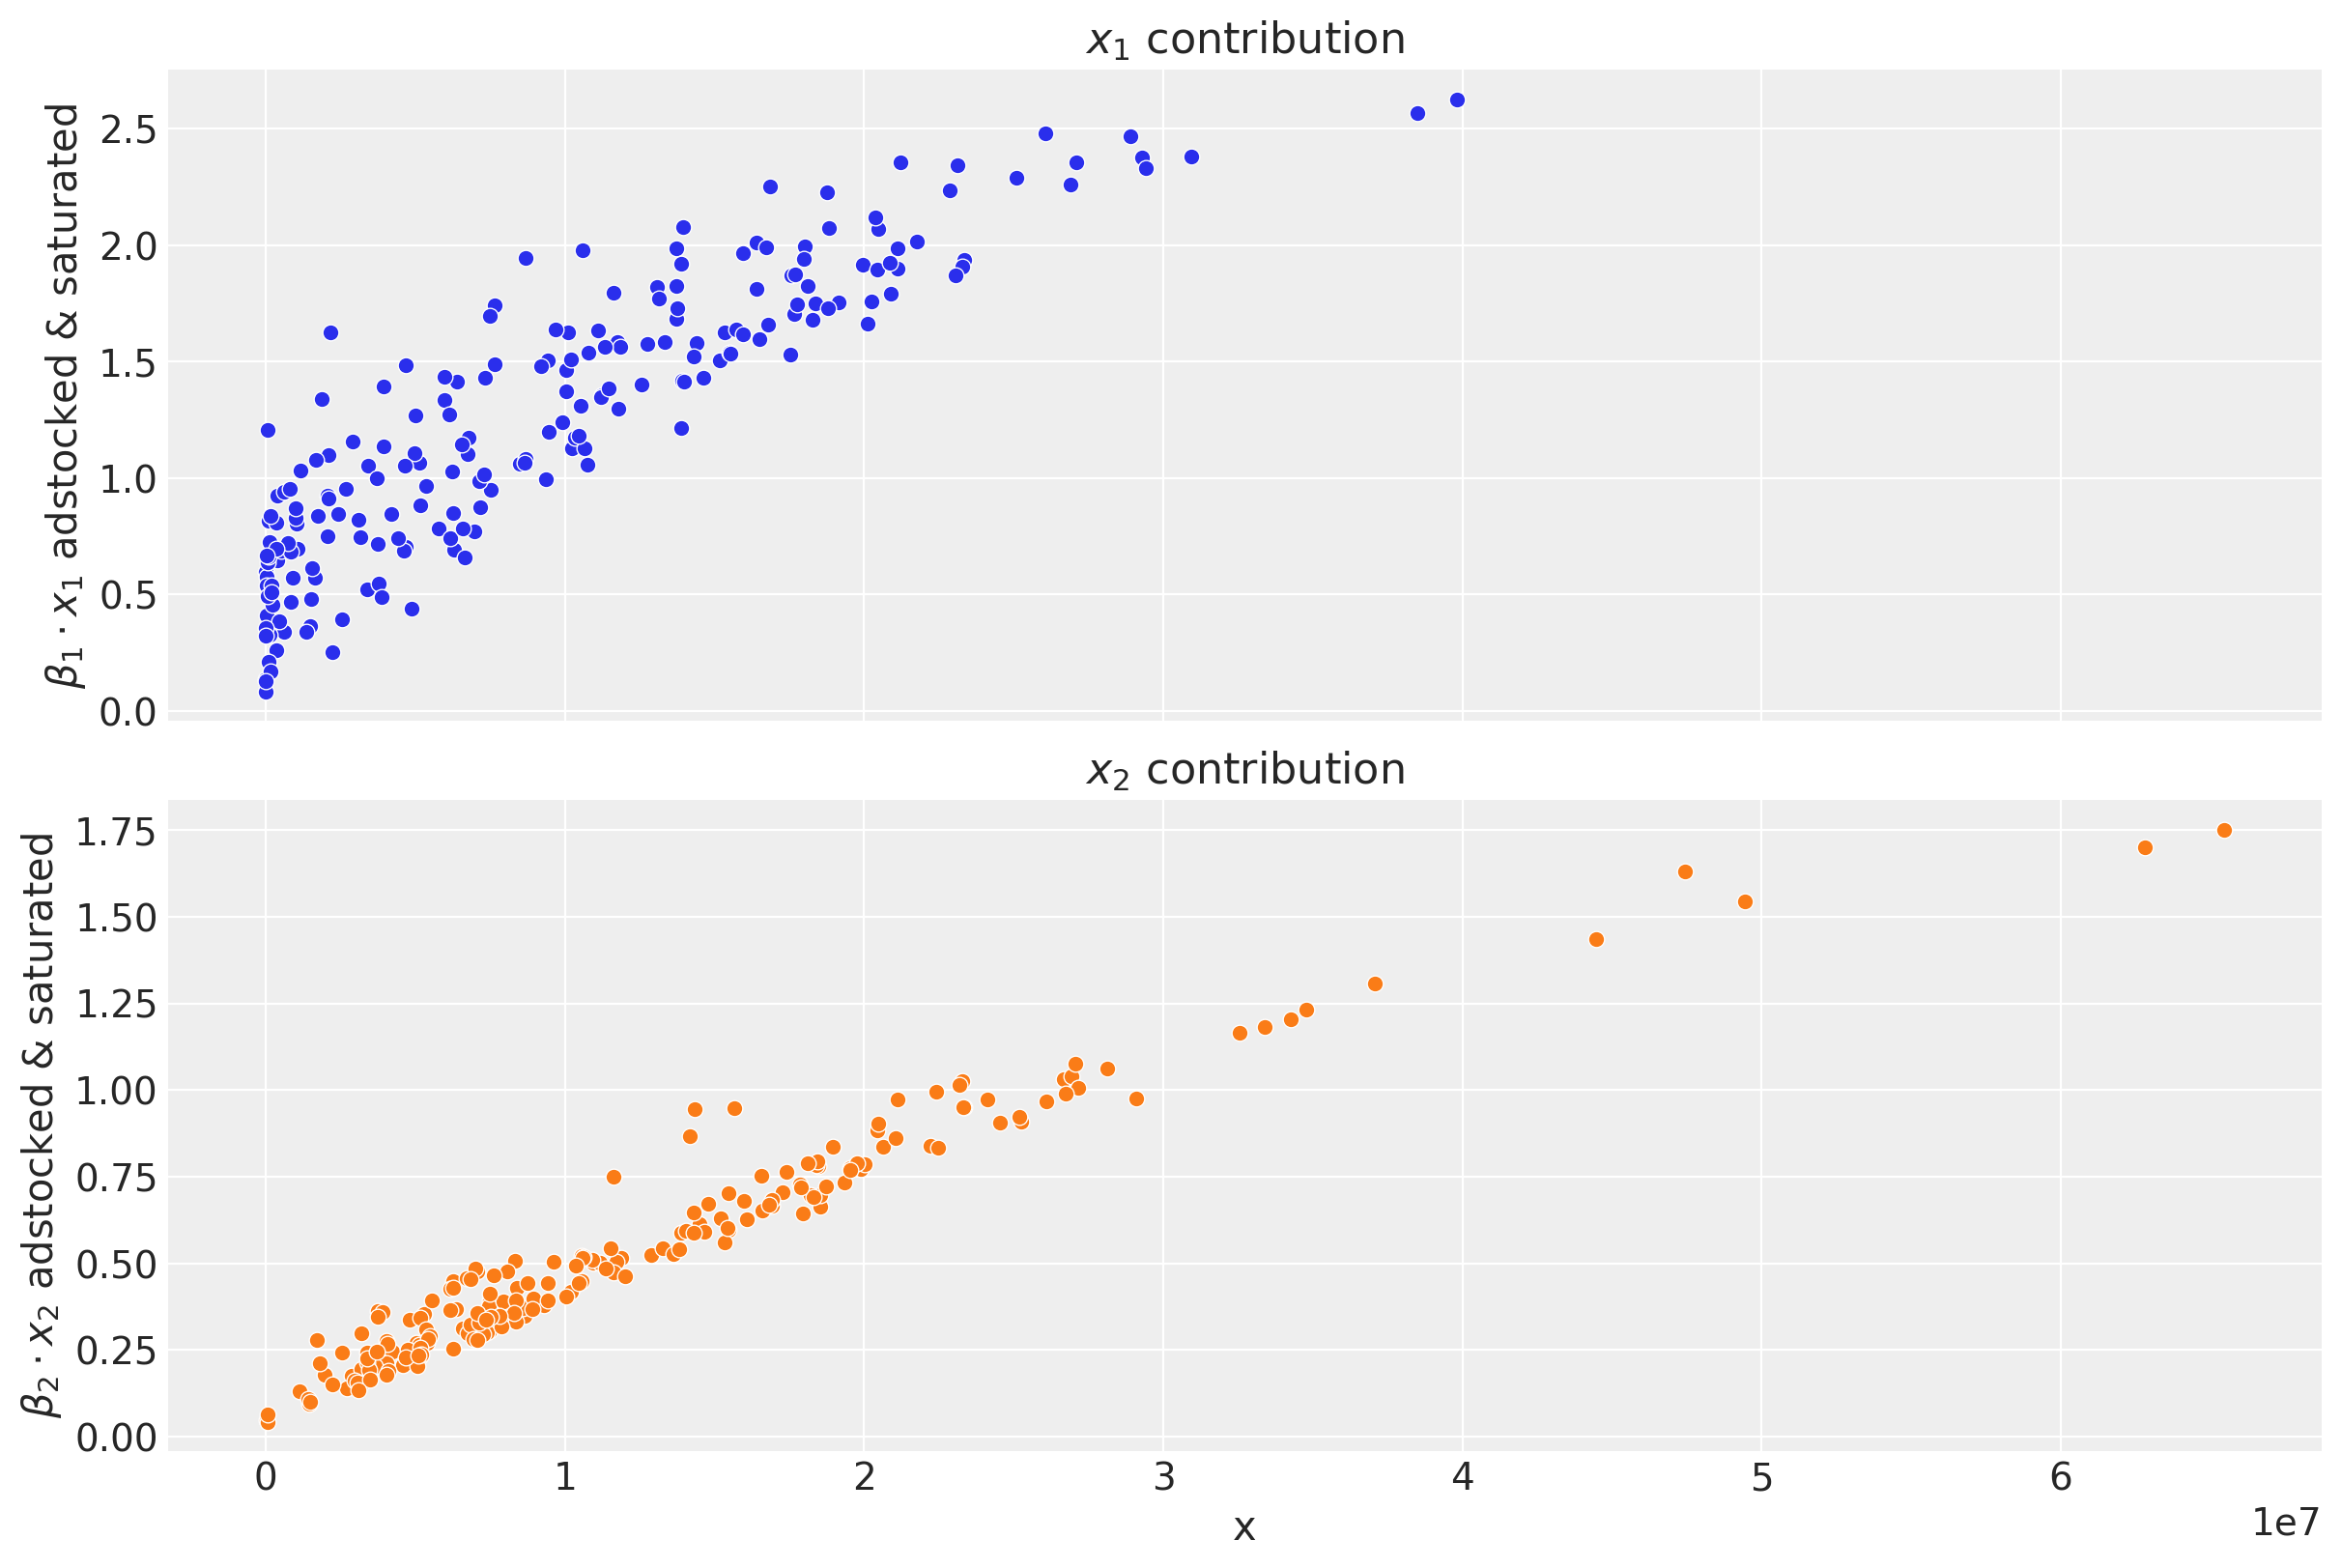

In [81]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 8), sharex=True, sharey=False, layout="constrained"
)

for i, x in enumerate(["mdip_dm", "mdip_inst"]):
    sns.scatterplot(
        x=dataset_dataframe[x],
        y=amplitude * betas[i] * dataset_dataframe[f"{x}_adstock_saturated"],
        color=f"C{i}",
        ax=ax[i],
    )
    ax[i].set(
        title=f"$x_{i + 1}$ contribution",
        ylabel=f"$\\beta_{i + 1} \cdot x_{i + 1}$ adstocked & saturated",
        xlabel="x",
    )

Sin adstocked y saturación

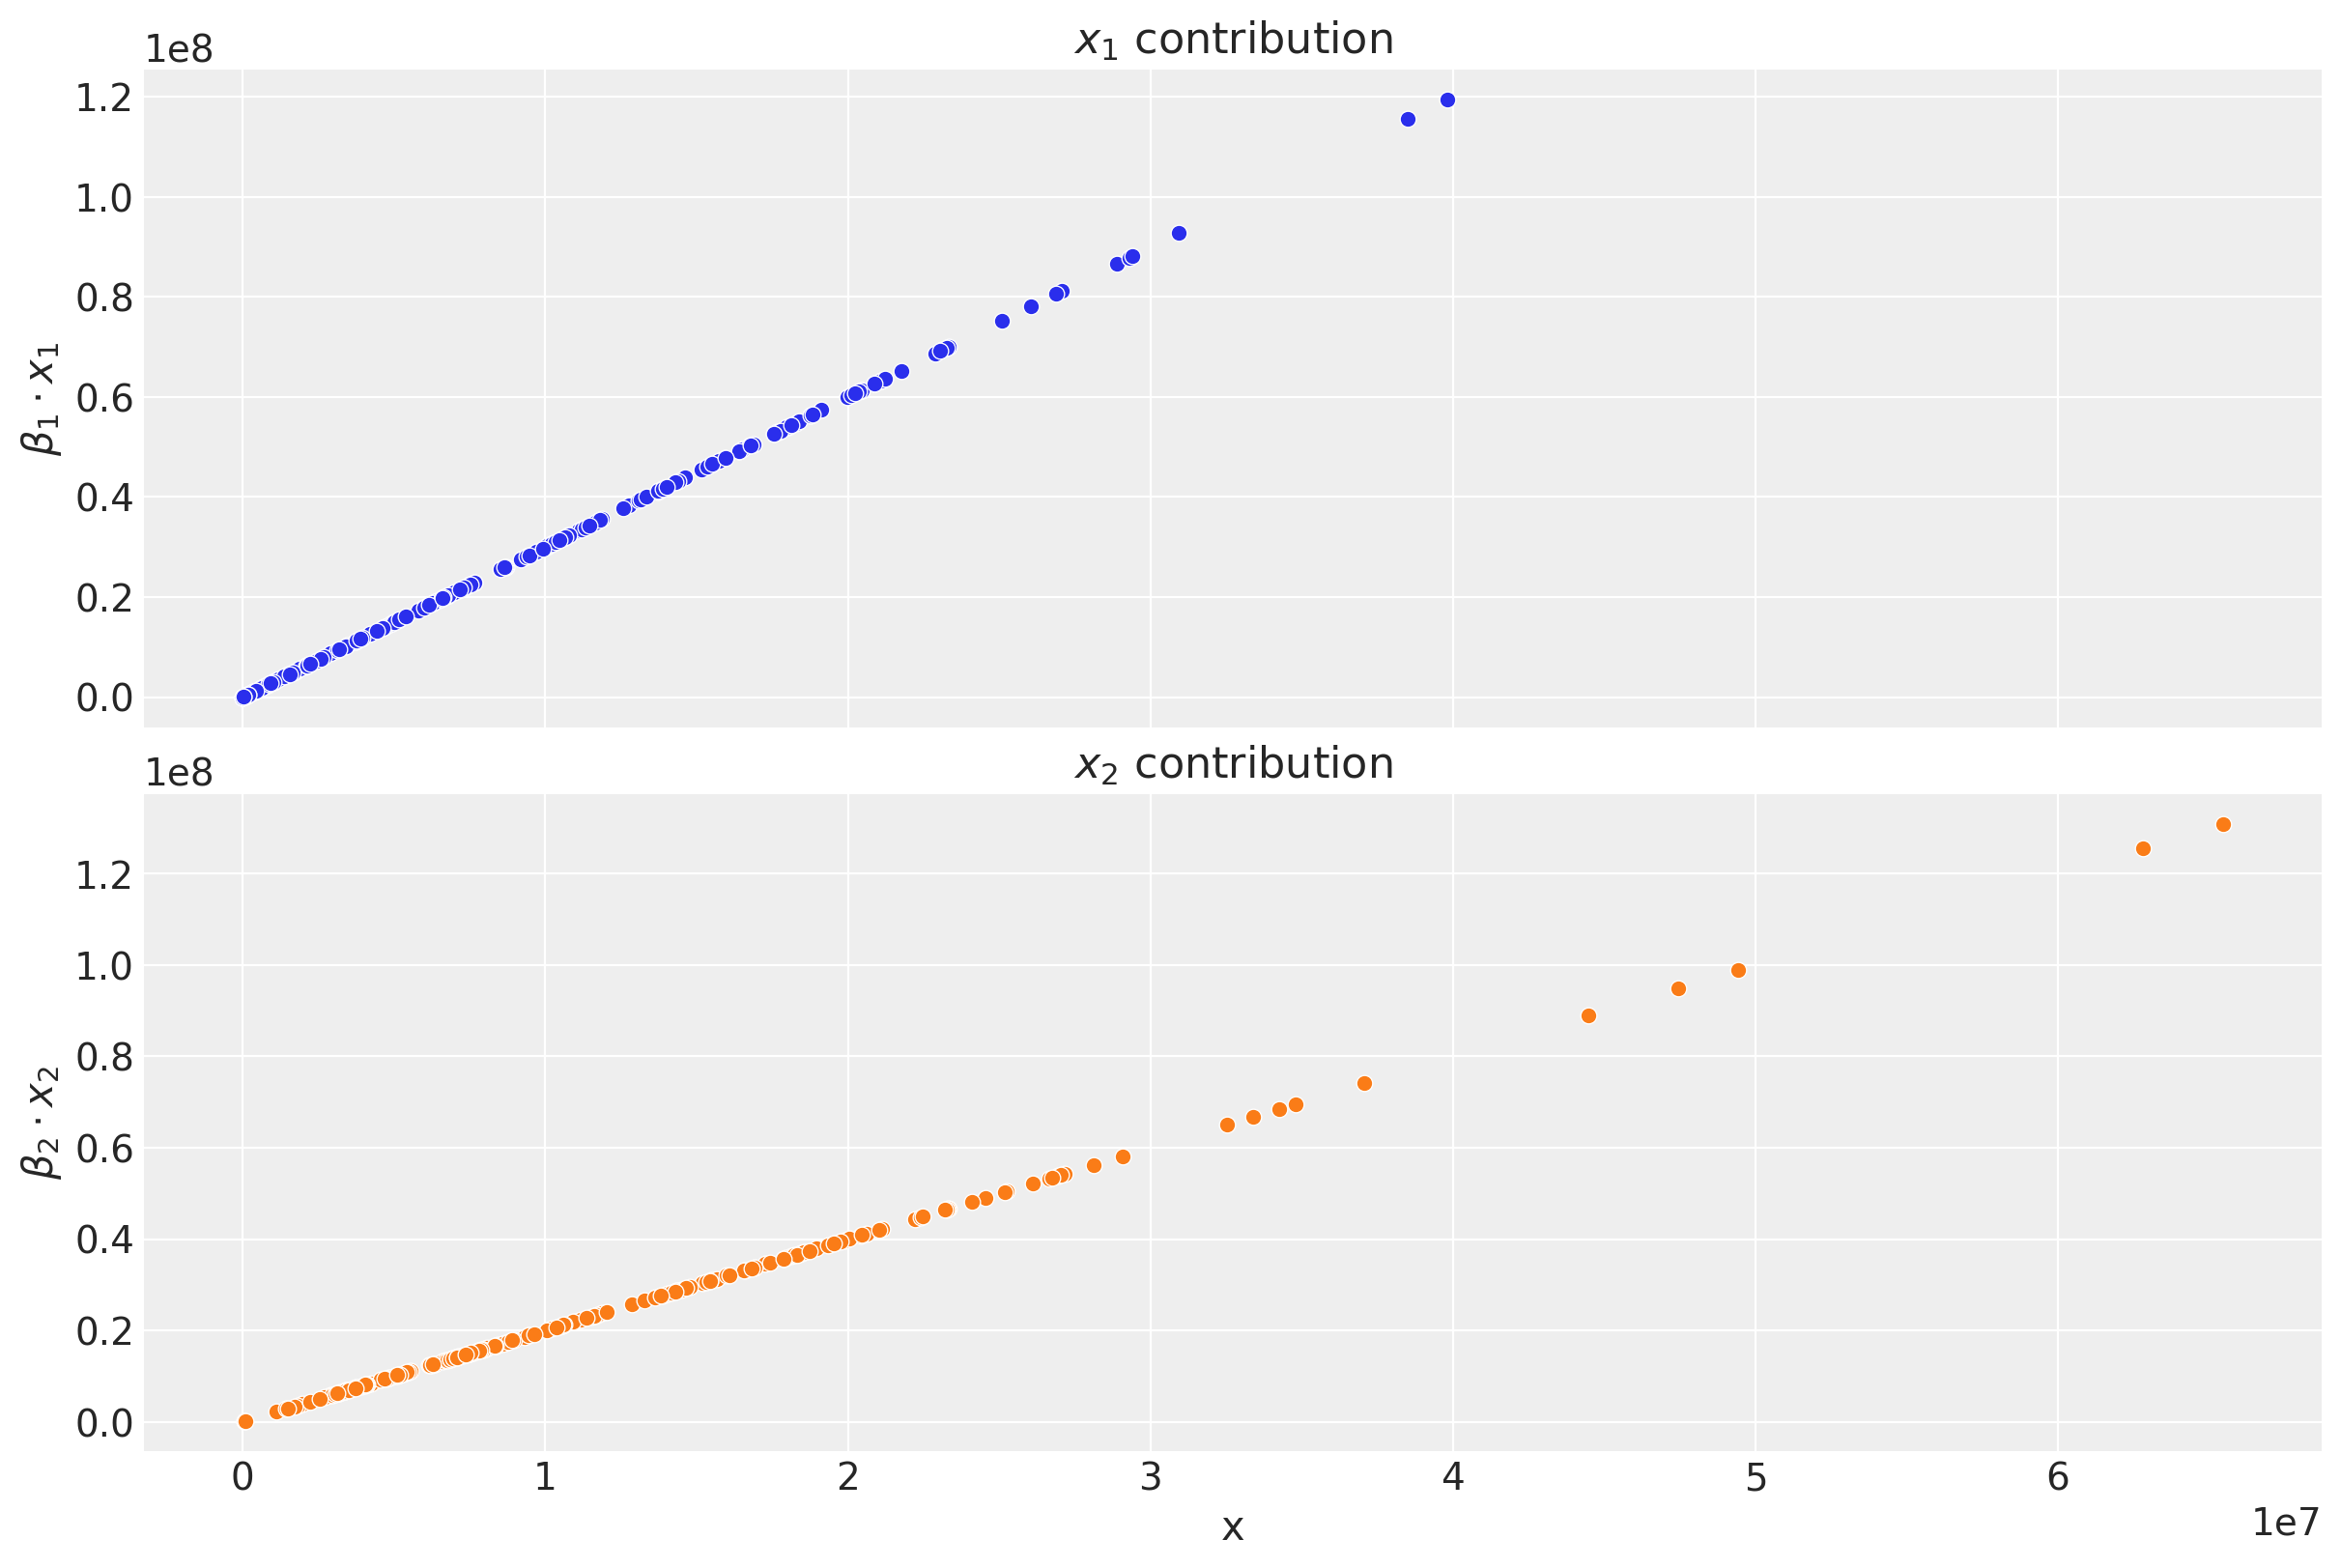

In [82]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 8), sharex=True, sharey=False, layout="constrained"
)

for i, x in enumerate(["mdip_dm", "mdip_inst"]):
    sns.scatterplot(
        x=dataset_dataframe[x],
        y=amplitude * betas[i] * dataset_dataframe[f"{x}"],
        color=f"C{i}",
        ax=ax[i],
    )
    ax[i].set(
        title=f"$x_{i + 1}$ contribution",
        ylabel=f"$\\beta_{i + 1} \cdot x_{i + 1}$",
        xlabel="x",
    )

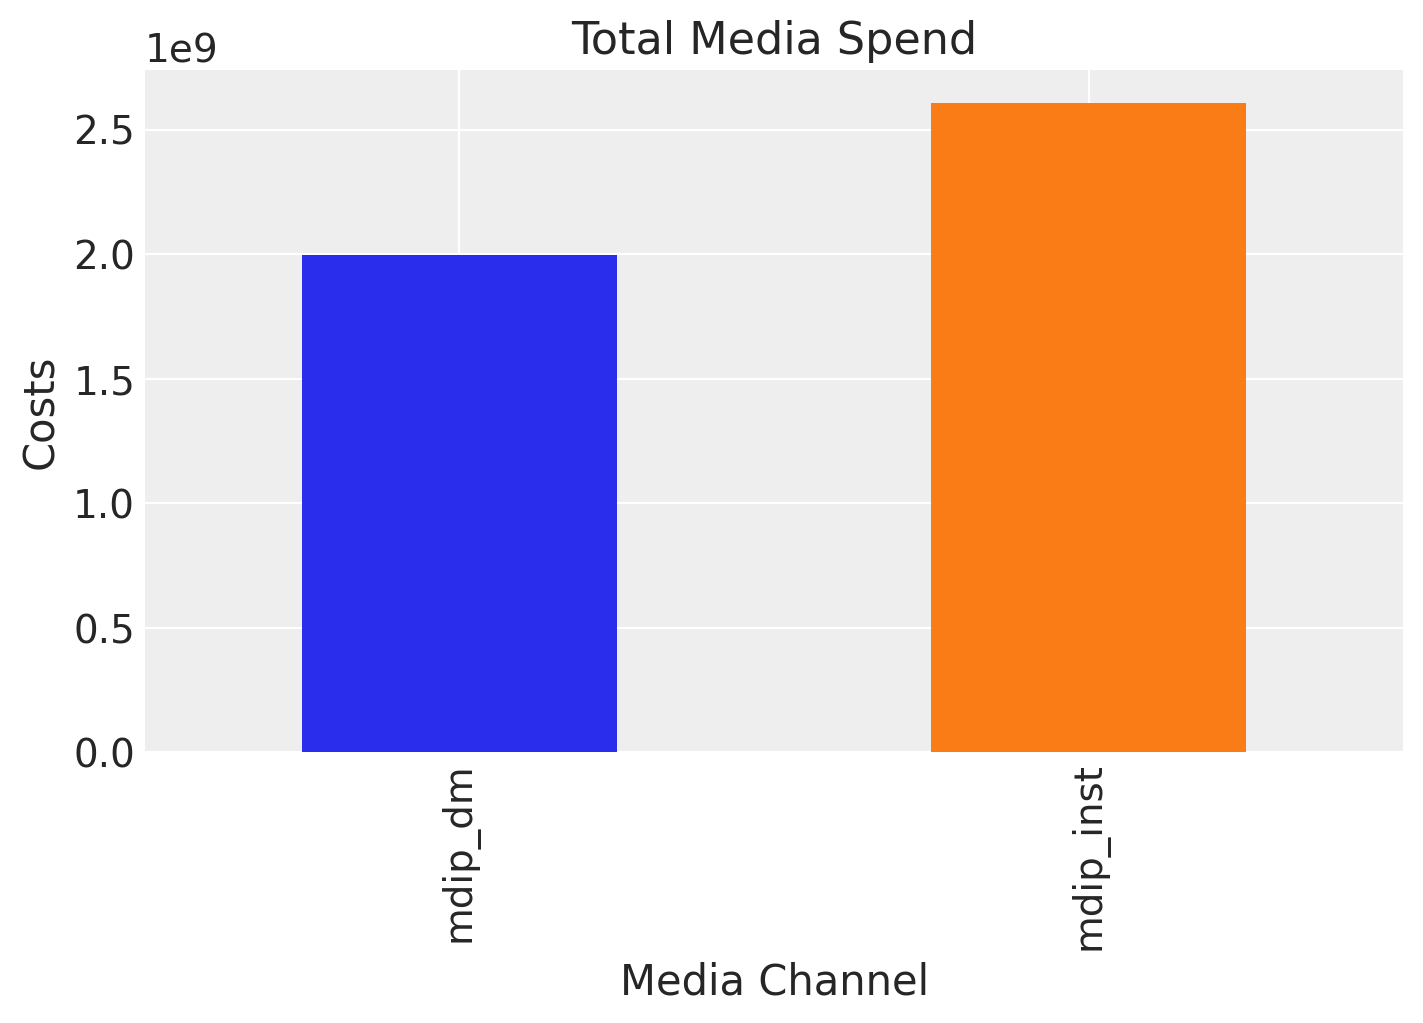

In [84]:
fig, ax = plt.subplots(figsize=(7, 5))
dataset_dataframe[["mdip_dm", "mdip_inst"]].sum().plot(kind="bar", color=["C0", "C1"], ax=ax)
ax.set(title="Total Media Spend", xlabel="Media Channel", ylabel="Costs");

### ROAS

In [87]:
roas_1 = (amplitude * beta_1 * dataset_dataframe["mdip_dm_adstock_saturated"]).sum() / dataset_dataframe["mdip_dm"].sum()
roas_2 = (amplitude * beta_2 * dataset_dataframe["mdip_inst_adstock_saturated"]).sum() / dataset_dataframe["mdip_inst"].sum()

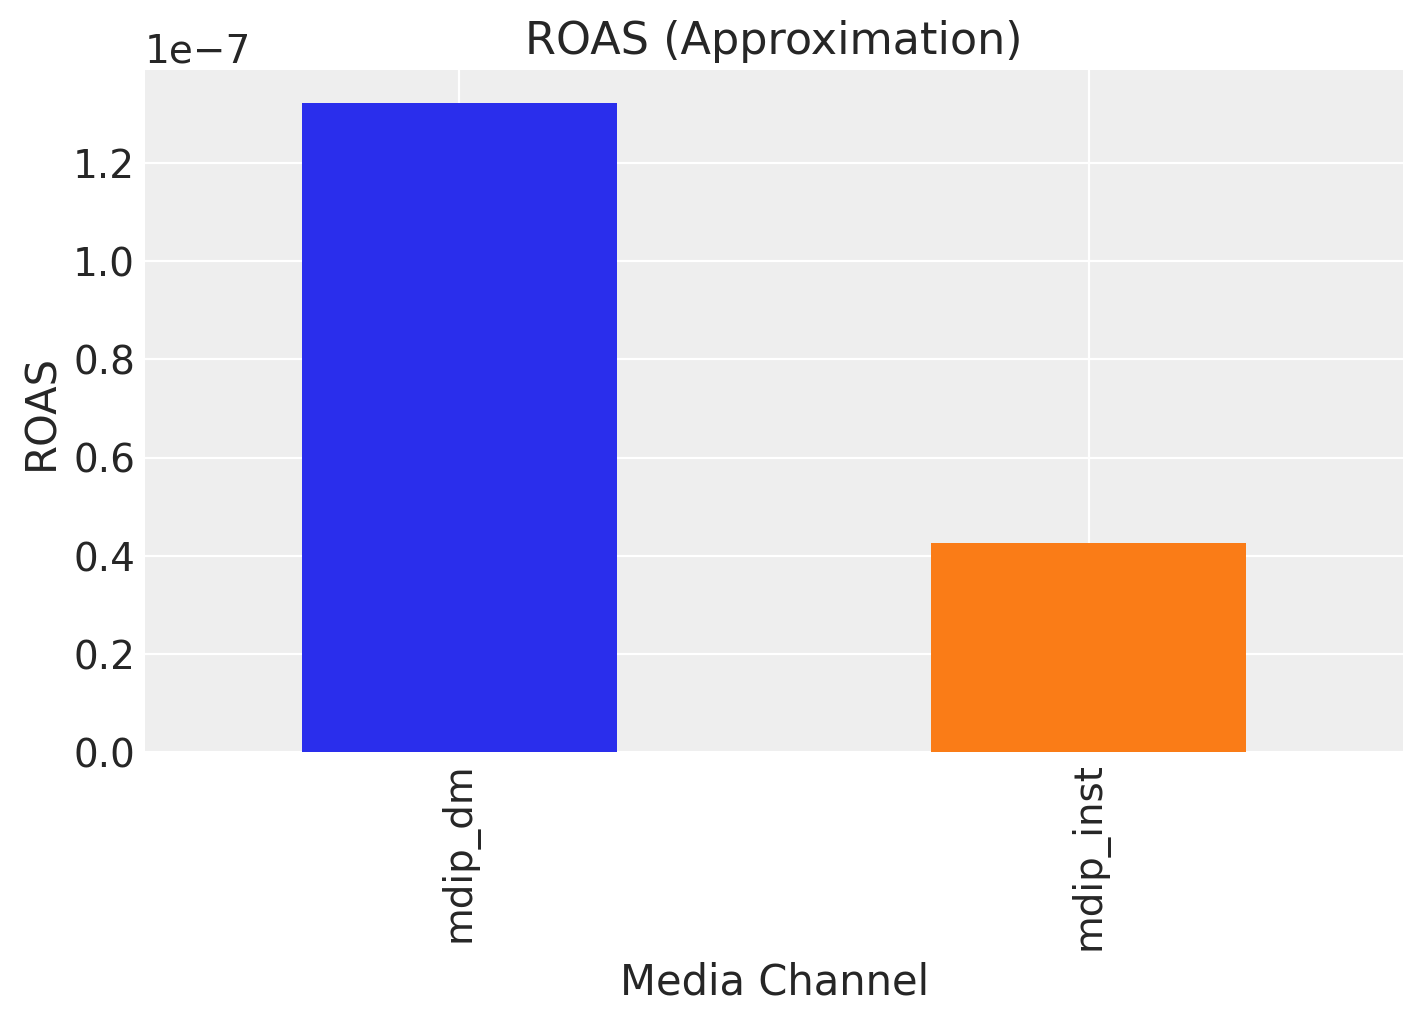

In [89]:
fig, ax = plt.subplots(figsize=(7, 5))
(
    pd.Series(data=[roas_1, roas_2], index=["mdip_dm", "mdip_inst"]).plot(
        kind="bar", color=["C0", "C1"]
    )
)

ax.set(title="ROAS (Approximation)", xlabel="Media Channel", ylabel="ROAS");